0       theta     Ne     Yield     Error     yield
3   15.8294   1801  0.000277  0.122659  0.000277
4   16.0388   6534  0.001004  0.064364  0.001004
5   16.2537  11485  0.001768  0.048519  0.001768
6   16.4743  12526  0.001930  0.046448  0.001930
7   16.7016  11604  0.001782  0.048277  0.001782
8   16.9279  11146  0.001713  0.049246  0.001713
9   17.1550  10189  0.001562  0.051528  0.001562
10  17.3814   9675  0.001481  0.052888  0.001481
11  17.6100   8899  0.001363  0.055127  0.001363
12  17.8362   8507  0.001303  0.056383  0.001303
13  18.0640   7906  0.001210  0.058473  0.001210
14  18.2900   7397  0.001130  0.060486  0.001130
15  18.5154   6874  0.001052  0.062700  0.001052
16  18.7437   6463  0.000991  0.064657  0.000991
17  18.9643   5232  0.000798  0.071942  0.000798
18  19.1849   2908  0.000446  0.096367  0.000446
19  19.4013   1073  0.000164  0.158683  0.000164
4       theta     Ne     Yield     Error     yield
10  17.4116   2336  0.000316  0.570014  0.000316
11  17.6244   67

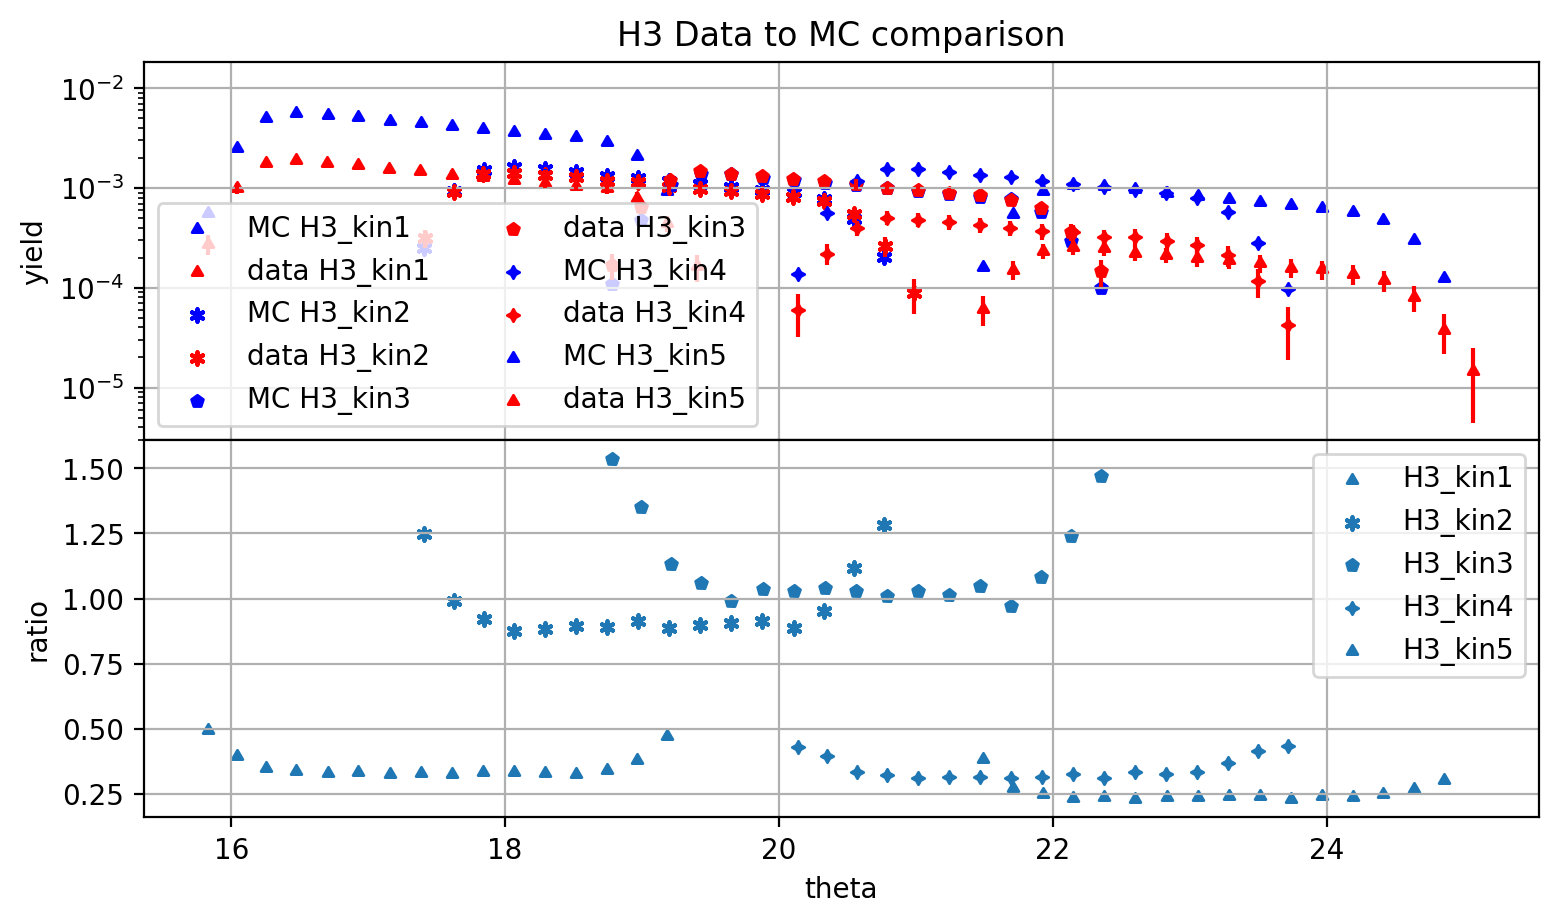

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import os,sys
import glob
import numpy as np



tgt="H3"


#runs=[1207,1233,1279,2570,1344,2632]
#if len(sys.argv) >1:
#    for i in range(1,len(sys.argv),1):
#        runs.append(sys.argv[i])
#else :
#    print('Please enter the runs you want to look at! -1 when done')
#    run=0
#    i=0
#    while run is not -1:
#        i=i+1
#        run=int(input("{}  ".format(i)))
#        if run==-1:
#            break
#        runs.append(run)       
#print( "Will look at runs ", runs)
mcfile='/home/jbane/tritium/Tri_offline/MC_comparison/yield_output/theta/'
datafile='/home/jbane/tritium/Tri_offline/yield/yield_output/theta/'
kins={}
kin={}

kins=sorted(glob.glob('{}{}*.dat'.format(mcfile,tgt)))

mcDF={}
dataDF={}
mcDFs={}
dataDFs={}
ratios={}
i=0
for i in range(len(kins)):
    kin[i] = kins[i].replace(mcfile,"")
    kin[i] = kin[i].replace('.dat',"")
    #print(kin[i])
    mcfileR=mcfile+'{}.dat'.format(kin[i])
    datafileR=datafile+'{}.dat'.format(kin[i])
    #print(datafileR)
    chk1=0
    chk=0
    if os.path.isfile(mcfileR):
        chk=1
    else:
        ("MC file does not exist") 
        chk=0
    if os.path.isfile(datafileR):
        chk1=1
    else :
        print("Data file does not exist")
        chk1=0
    if chk==0 or chk1==0:
        continue     

    mcDF[i]=pd.read_table(mcfileR,delim_whitespace=True)
    dataDF[i]=pd.read_table(datafileR,delim_whitespace=True)
    mcDF[i]['yield']=mcDF[i]['Yield']/1000.0
    mcDF[i]['Error']=mcDF[i]['Error']/1000.0
    
    dataDF[i]['yield']=dataDF[i]['Yield']
    mcmed=mcDF[i]['yield'].mean()
    datamed=dataDF[i]['yield'].mean()
    mcDFs[i]=mcDF[i][mcDF[i]['yield'] >=mcmed *0.5]
    dataDFs[i]=dataDF[i][dataDF[i]['yield'] >= datamed *0.5]
    mcDFs[i]=mcDFs[i].dropna()
    dataDFs[i]=dataDFs[i].dropna()
    #drop the first 2 and last 2 bins
    
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[0])
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[0])
    dl=len(dataDFs[i])
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[dl-1])
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[dl-2])    
    
  #  mcDFs[i]=mcDFs[i].drop(mcDFs[i].index[0])
  #  mcDFs[i]=mcDFs[i].drop(mcDFs[i].index[0])
    ml=len(dataDFs[i])
  #  mcDFs[i]=mcDFs[i].drop(mcDFs[i].index[ml-1])
  #  mcDFs[i]=mcDFs[i].drop(mcDFs[i].index[ml-2])
    
    
    
    
    
    if len(dataDFs[i]) <2 :
            continue
    print(i, dataDFs[i])
    #dataDFs[i]= dataDFs[i].drop(dataDFs[i].index[[0,len(dataDFs[i])-1]])
    #mcDFs[i]=     mcDFs[i].drop(mcDFs[i].index[  [0,  len(mcDFs[i])-1]])
    dataDFs[i]['Stat_err']=1.0/np.sqrt((dataDFs[i]['Ne']))*dataDFs[i]['yield']*10
    ratios[i] = mcDFs[i].copy()
    #ratios[i].drop('yield')
    ratios[i]['data_Y'] =dataDFs[i]['yield']
    ratios[i]['MC_Y'] = mcDFs[i]['yield']
    ratios[i]['ratio'] = dataDFs[i]['yield']/mcDFs[i]['yield']
    ratios[i]['offset'] = dataDFs[i]['yield'] - mcDFs[i]['yield']
 
    i=i+1
    
import matplotlib._color_data as mcd
overlap = [name for name in mcd.CSS4_COLORS if "xkcd:" + name in mcd.XKCD_COLORS]

markers =[[3,0,0]  ,[5,1,90] ,[4,0,90],[3,1,90],[6,2,0] ,[5,0,0] ,[4,1,0],[3,0,0]]
markers2 =[[3,0,0] ,[5,1,90] ,[4,0,90],[3,1,90],[6,2,0] ,[5,0,70],[4,1,0],[3,0,0]]
colors=['red', 'Green', 'Blue', 'Orange', 'Purple', 'Cyan', 'Magenta','Teal','Brown','Maroon','Mint','Navy']#, f032e6, bcf60c, fabebe, 008080, e6beff, 9A6324, fffac8, 800000, aaffc3, 808000, ffd8b1, 000075, a9a9a9, ffffff, 000000]
fig= plt.figure(dpi=200,figsize=(9,5))
ax=fig.add_subplot(2,1,1)
plt.title('{} Data to MC comparison'.format(tgt))
bx=fig.add_subplot(2,1,2, sharex=ax)

#fig,bx=plt.subplots(dpi=250)
k=int(0)
for j in range(len(mcDF)):
    xkcd = mcd.XKCD_COLORS["xkcd:" + overlap[j]].upper()
    xkcd2 = mcd.XKCD_COLORS["xkcd:" + overlap[j+len(mcDF)]].upper()
    #print(j , kin[j])
    #print()
    if k == 7:
        k = 0
    if(len(dataDFs[j])) == 0:
        continue
    #if j == 110:
     #   ax = mcDFs[j].plot(x='theta',y='yield',yerr=':error',kind='scatter', marker=markers[j], color='blue', label='MC run{}'.format(runs[j]))
    #else :
    mcDFs[j].plot(ax=ax,x='theta',y='yield',yerr='Error',kind='scatter',marker=markers[j], color='blue', label='MC {}'.format(kin[j]))
    
    dataDFs[j].plot(ax=ax,x='theta',y='yield',yerr='Stat_err',kind='scatter', marker=markers2[j], color='red', label='data {}'.format(kin[j]))
    ratios[j].plot(ax=bx,x='theta' ,y='ratio', xerr='offset', kind='scatter', label='{}'.format(kin[j]),marker=markers2[j] )
    k=k+1
    print(j , kin[j])    
ax.set_yscale("log")
ax.grid(True)
bx.grid(True)
ax.legend(ncol=2)
#bx.legend(ncol=2)

fig.subplots_adjust(hspace=0)
fig.savefig('images/{}_all.png'.format(tgt))


In [10]:
kins\

<generator object _iglob at 0x7f7f6d1c53b8>

In [58]:
runDF= pd.read_table('./yield_output/byrun/1282.dat', delim_whitespace=True)

fullDF=pd.read_table('./yield_output/theta/He3_kin3.dat',delim_whitespace=True)




In [64]:
runDF=runDF.dropna()
fullDF=fullDF.dropna()

In [65]:
runDF

,theta,:Ne,yield,:error
2,18.5795,5,0.000001,5.293280e-07
3,19.2148,4045,0.001278,2.009660e-05
4,19.9017,8849,0.002386,2.536070e-05
5,20.7751,8933,0.001886,1.994970e-05
6,21.6099,7972,0.001330,1.489340e-05
7,22.2322,1229,0.000161,4.602590e-06


In [66]:
fullDF

,theta,Ne,Yield,Error
2,18.5821,36,0.004008,0.000001
3,19.2180,39383,5.170960,0.001609
4,19.9051,86102,9.676050,0.002557
5,20.7756,85768,7.578370,0.001562
6,21.6107,78546,5.477780,0.000886
7,22.2379,11878,0.653709,0.000082


In [70]:
rat=fullDF.copy()
rat['ratio']=runDF['yield']/fullDF['Yield']

In [72]:
rat['ratio']=rat['ratio']*1000

In [73]:
rat

,theta,Ne,Yield,Error,ratio
2,18.5821,36,0.004008,0.000001,0.295293
3,19.2180,39383,5.170960,0.001609,0.247178
4,19.9051,86102,9.676050,0.002557,0.246553
5,20.7756,85768,7.578370,0.001562,0.248805
6,21.6107,78546,5.477780,0.000886,0.242757
7,22.2379,11878,0.653709,0.000082,0.246828
